In [2]:
from brian2 import *
import numpy as np
random_array = np.random.rand(10) * hertz
poisson_neurons = PoissonGroup(10, rates=random_array)
g = NeuronGroup(1, 'dge/dt = -v / (10*ms) : 1', threshold='v>1', reset='v=0', method='exact')
s = Synapses(poisson_neurons, g, on_pre='ge += 0.2')

In [ ]:
from brian2 import *
from input import *
from network import *

exc_neuron_specs = NeuronSpecs(
    neuron_type="excitatory",
    length=14,
    cm=500 * pF,
    g_leak=25 * nS,
    v_threshold=-53 * mV,
    v_reset=-57 * mV,
    v_rest=-74 * mV,
    v_reversal_e=0 * mV,
    v_reversal_i=-70 * mV,
    sigma=0.015 * mV,
    t_refract=2 * ms,  # NEED TO ADD THIS
    tau_m=20 * ms,
    tau_ee=2 * ms,
    tau_ie=5 * ms,
)

inh_neuron_specs = NeuronSpecs(
    neuron_type="inhibitory",
    length=7,
    cm=214 * pF,
    g_leak=18 * nS,
    v_threshold=-53 * mV,
    v_reset=-58 * mV,
    v_rest=-82 * mV,
    v_reversal_e=0 * mV,
    v_reversal_i=-70 * mV,
    sigma=0.015 * mV,
    tau_m=12 * ms,
    tau_ei=2 * ms,
    tau_ii=5 * ms,
)
stdp_synapse_specs = StdpSynapseSpecs(
        lambda_e=0.1,
        A_minus=0.1,
        A_plus=0.1,
        alpha_C=0.5,
        alpha_D=0.5,
        tau_c=3 * ms,
        tau_d=5 * ms,
)

layer = 1
exc_neuron_specs.create_neurons(layer)
inh_neuron_specs.create_neurons(layer)

stdp_synapse_specs.create_synapses(exc_neuron_specs, inh_neuron_specs, 2, layer)
stdp_synapse_specs.animate_plots(exc_neuron_specs, inh_neuron_specs, 2, layer)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
%matplotlib inline

def plot_grids(scale1=1.0, scale2=1.0):
    plt.figure(figsize=(8, 8))
    ax = plt.gca()
    ax.cla()  # Clear the current figure
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_aspect('equal')

    # First grid (blue solid lines)
    x1 = np.arange(-10, 10 + scale1, scale1)
    y1 = np.arange(-10, 10 + scale1, scale1)
    for x in x1:
        ax.axvline(x, color='blue', linestyle='-', alpha=0.5)
    for y in y1:
        ax.axhline(y, color='blue', linestyle='-', alpha=0.5)

    # Second grid (red dashed lines)
    x2 = np.arange(-10, 10 + scale2, scale2)
    y2 = np.arange(-10, 10 + scale2, scale2)
    for x in x2:
        ax.axvline(x, color='red', linestyle='--', alpha=0.5)
    for y in y2:
        ax.axhline(y, color='red', linestyle='--', alpha=0.5)

    # Origin point
    ax.plot(0, 0, 'ko')  # Black dot at (0,0)

    # Add scale annotations
    ax.text(0.05, 0.95, f'Scale1: {scale1}', transform=ax.transAxes, color='blue', fontsize=12, verticalalignment='top')
    ax.text(0.05, 0.90, f'Scale2: {scale2}', transform=ax.transAxes, color='red', fontsize=12, verticalalignment='top')

    ax.grid(False)
    plt.show()

# Interactive sliders for scaling
interact(plot_grids,
         scale1=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='Scale 1'),
         scale2=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='Scale 2'))

interactive(children=(FloatSlider(value=1.0, description='Scale 1', max=5.0, min=0.1), FloatSlider(value=1.0, …

<function __main__.plot_grids(scale1=1.0, scale2=1.0)>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
%matplotlib inline

def plot_grids(scale1=1.0, scale2=1.0):
    plt.figure(figsize=(8, 8))
    ax = plt.gca()
    ax.cla()  # Clear the current figure
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_aspect('equal')

    # First grid (blue solid lines)
    limit = 10
    # Generate grid lines that pass through the origin and extend beyond it
    num_lines1 = int(np.ceil(limit / scale1))
    x1 = np.arange(-num_lines1 * scale1, (num_lines1 + 1) * scale1, scale1)
    y1 = x1  # Since it's symmetric
    for x in x1:
        ax.axvline(x, color='blue', linestyle='-', alpha=0.5)
    for y in y1:
        ax.axhline(y, color='blue', linestyle='-', alpha=0.5)

    # Second grid (red dashed lines)
    num_lines2 = int(np.ceil(limit / scale2))
    x2 = np.arange(-num_lines2 * scale2, (num_lines2 + 1) * scale2, scale2)
    y2 = x2
    for x in x2:
        ax.axvline(x, color='red', linestyle='--', alpha=0.5)
    for y in y2:
        ax.axhline(y, color='red', linestyle='--', alpha=0.5)

    # Origin point
    ax.plot(0, 0, 'ko')  # Black dot at (0,0)

    # Add scale annotations
    ax.text(0.05, 0.95, f'Scale1: {scale1}', transform=ax.transAxes, color='blue', fontsize=12, verticalalignment='top')
    ax.text(0.05, 0.90, f'Scale2: {scale2}', transform=ax.transAxes, color='red', fontsize=12, verticalalignment='top')

    ax.grid(False)
    plt.show()

# Interactive sliders for scaling
interact(plot_grids,
         scale1=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='Scale 1'),
         scale2=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='Scale 2'))

interactive(children=(FloatSlider(value=1.0, description='Scale 1', max=5.0, min=0.1), FloatSlider(value=1.0, …

<function __main__.plot_grids(scale1=1.0, scale2=1.0)>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
%matplotlib inline

def plot_grids(scale1=1.0, scale2=1.0):
    plt.figure(figsize=(8, 8))
    ax = plt.gca()
    ax.cla()  # Clear the current figure

    limit = 10  # You can adjust this limit as needed
    ax.set_xlim(0, limit)
    ax.set_ylim(0, limit)
    ax.set_aspect('equal')

    # First grid (blue solid lines)
    num_lines1 = int(np.ceil(limit / scale1))
    x1 = np.arange(0, (num_lines1 + 1) * scale1, scale1)
    y1 = x1  # Since it's symmetric
    for x in x1:
        ax.axvline(x, color='blue', linestyle='-', alpha=0.5)
    for y in y1:
        ax.axhline(y, color='blue', linestyle='-', alpha=0.5)

    # Second grid (red dashed lines)
    num_lines2 = int(np.ceil(limit / scale2))
    x2 = np.arange(0, (num_lines2 + 1) * scale2, scale2)
    y2 = x2
    for x in x2:
        ax.axvline(x, color='red', linestyle='--', alpha=0.5)
    for y in y2:
        ax.axhline(y, color='red', linestyle='--', alpha=0.5)

    # Origin point
    ax.plot(0, 0, 'ko')  # Black dot at (0,0)

    # Add scale annotations
    ax.text(0.05, 0.95, f'Scale1: {scale1}', transform=ax.transAxes, color='blue', fontsize=12, verticalalignment='top')
    ax.text(0.05, 0.90, f'Scale2: {scale2}', transform=ax.transAxes, color='red', fontsize=12, verticalalignment='top')

    ax.grid(False)
    plt.show()

# Interactive sliders for scaling
interact(plot_grids,
         scale1=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='Scale 1'),
         scale2=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='Scale 2'))

interactive(children=(FloatSlider(value=1.0, description='Scale 1', max=5.0, min=0.1), FloatSlider(value=1.0, …

<function __main__.plot_grids(scale1=1.0, scale2=1.0)>

WARNING    /Users/jreid/Dropbox/dphil/programming/spikes/spikes/network/synapses.py:300: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.waitforbuttonpress()
 [py.warnings]


row_min:0
row_max:2
row_coords:[0 0 1 1]
col_coords:[0 1 0 1]


KeyboardInterrupt: 

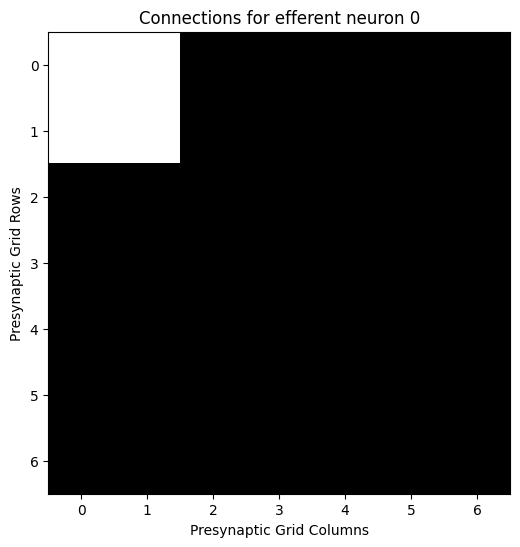